# Reliable News Web Scraping

In [ ]:
! nvidia-smi

In [ ]:
! pip install requests
! apt-get update

In [ ]:
# Imports
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [ ]:
def get_articles_links(page):
    '''Gets links to articles from termedia.pl.

    Args:
        page (int): Page number of termedia.pl to process. 
    
    Returns:
        links (list): List of links to articles.
    '''
    url = 'https://www.termedia.pl/koronawirus/?&p=' + str(page)
    print(f'Processing page {page}: {url}')
    req = requests.get(url)  
    req.encoding = 'utf-8'                           
    soup = BeautifulSoup(req.text, 'html.parser')
    links = soup.find_all('div', attrs={'class': 'pl2Pos'}) 

    return links

def extract_text_from_article(url):
    '''Gets the article's title, content and URL.
    
    Args:
        url (str): URL of the article.
    
    Returns:
        (tuple): Tuple containing:
            title: Article's title.
            text: Article's content.
            url: Article's url.
    '''

    req = requests.get(url_art)
    req.encoding = 'utf-8'                             

    soup_art = BeautifulSoup(req_art.text, 'html.parser')

    title = soup_art.find('div', attrs={'class': 'pageTitle'}).text

    try:
        text = ' '.join([t.text for t in soup_art.find_all('div', attrs={'class': 'articleContent'})])
    except AttributeError:
        text = ''

    article_url = 'https://www.termedia.pl' + link.find('a')['href'].strip()

    return title, text, article_url

In [ ]:
articles_counter = 0
pages_to_scrap = 144

df = pd.DataFrame(columns=['Verdict', 'Title', 'Text', 'Url'])

for page in range(1, pages_to_scrap + 1):
    links = get_articles_links(page)

    for idx, link in enumerate(links):
        articles_counter += 1
        title, text, url_art = extract_text_from_article(link)
        
        df.loc[10 * (page-1) + idx] = ['true', title, text, url_art]
    
df.to_excel('data/termedia_dataset.xlsx', encoding='utf-8', index=False)
display(df.head())
print(f'Scraped articles in total: {len(df)}')

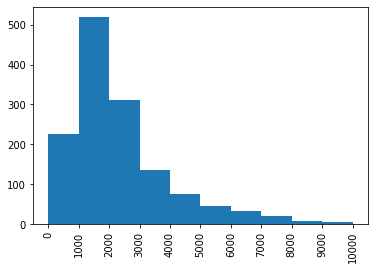

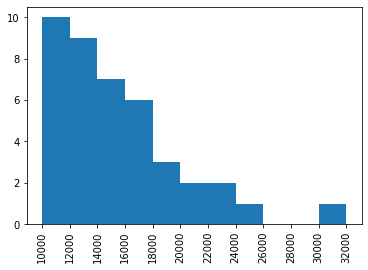

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('termedia_dataset.xlsx', encoding='utf-8', index=False)

plt.hist(df['Text'].astype(str).apply(len), bins=range(0, 11000, 1000))
plt.xticks(range(0, 11000, 1000))
plt.xticks(rotation='vertical')
plt.show()

plt.hist(df['Text'].astype(str).apply(len), bins=range(10000, max(df['Text'].astype(str).apply(len)), 2000))
plt.xticks(range(10000, max(df['Text'].astype(str).apply(len)), 2000))
plt.xticks(rotation='vertical')
plt.show()
